Decision Tree Classifier Building in Scikit-learn

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 


![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
*   All the tuples belong to the same attribute value.
*   There are no more remaining attributes.
*   There are no more instances.

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png)


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier   # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

print(iris.feature_names)
print(iris.target_names)
print(X[0:10])
print(Y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

clf = DecisionTreeClassifier(criterion = 'entropy')  
clf.fit(X_train, y_train) 

idx = 8 
x = X_test[idx]
x = x.reshape((1, x.shape[0]))

y_pred_en = clf.predict(x)
print('predicted test:', y_pred_en)
print('actual test:', y_test[idx])

predicted test: [2]
actual test: 2


1. เขียนคำสั่งเพื่อคำนวณค่าความแม่นยำ (accuracy) บน test data  

Accuracy of decision tree =   0.9555555555555556


2. เขียนคำสั่งจำลองข้อมูล 1 record เพื่อให้โมเดลทำนายลาเบล 

predicted test: [1]


3. เขียนชุดคำสั่งเพื่อแสดงจำนวนข้อมูลบน test data ที่โมเดลจำแนกผิด

error :  2 out of 45
error :  2 out of 45


## Two approaches of Saving and Reloading a ML Model in sklearn: 

## 1) Pickle Approach

## 2) Joblib Approach

In [33]:
import pickle                      ## pickle approch

Pkl_Filename = "Pickle_RL_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [38]:
with open(Pkl_Filename, 'rb') as file:            ## load pickle file
    clf = pickle.load(file)

results = clf.predict(X_test)
print(results)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [40]:
from sklearn.externals import joblib         ## joblib approach 

joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(clf,joblib_file)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['joblib_RL_Model.pkl']

In [41]:
joblib_LR_model = joblib.load(joblib_file)        ## load pickle file 
joblib_LR_model  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualizing Decision Trees

ต้องการ install package graphviz บน anaconda 
>> conda install python-graphviz

In [47]:
!pip install graphviz                 ##  convert decision tree into dot file  
!pip install pydotplus                ##   convert this dot file to png or displayable form on Jupyter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


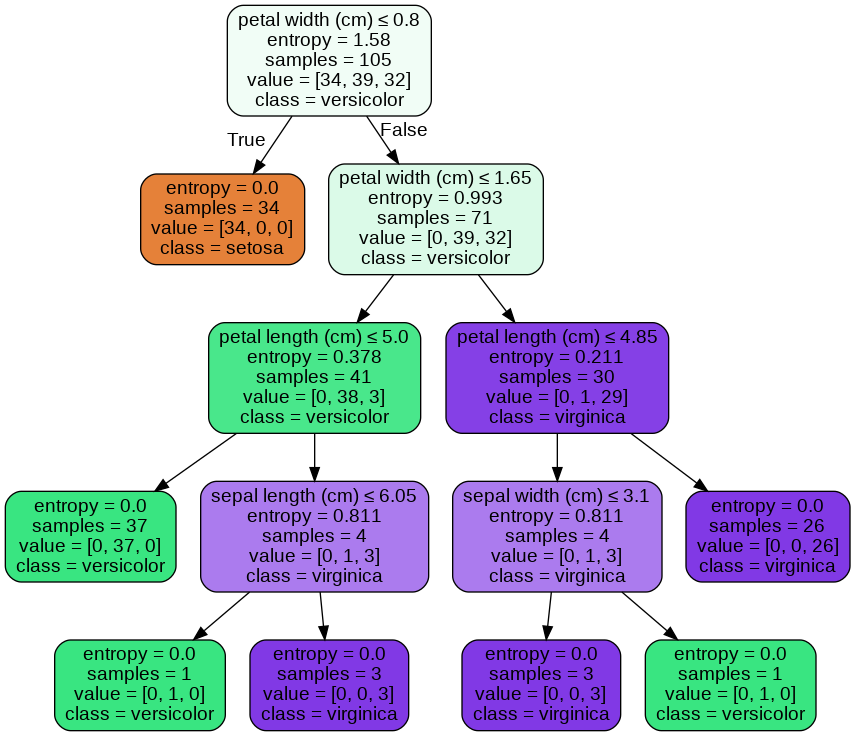

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

# XGBoost 



In [51]:
!pip install xgboost

# https://xgboost.readthedocs.io/en/latest/parameter.html

In [71]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", n_estimators = 10) 
xgb_model.fit(X_train, y_train)

result = xgb_model.score(X_test, y_test)
print("accuracy of XGBoost = ", result)

y_pred_en = xgb_model.predict(X_test)
print(y_pred_en)
print('total error : ' , sum(np.not_equal(y_test, y_pred_en)), 'out of', len(X_test))

accuracy of XGBoost =  0.9777777777777777
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1 2 2 0 1 2 2 0]
total error :  1 out of 45


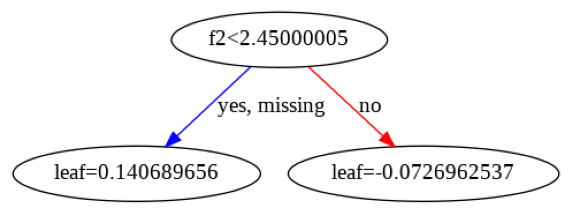

In [68]:
from xgboost import plot_tree

plot_tree(xgb_model, num_trees=0)

## Homework 

1. โหลดชุดข้อมูล abalone จากเว็บด้านล่าง จากนั้นทำการสร้างต้นไม้ตัดสินใจ โดยแบ่งชุดข้อมูลออกเป็น 80% สำหรับ train และ 20% สำหรับทดสอบ 
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [19]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

print(df.shape)
print(df.head(10))

df = df.replace('M', 0)
df = df.replace('F', 1)
df = df.replace('I', 2)

print(df.head(10))

data = df.values
X = data[:,:-1]            ## get input data
Y = data[:,-1]             ## get labels 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
## define decision tree model 
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train)  

result = clf.score(X_test, y_test)
print('accuracy = ', result)

(4176, 9)
   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8
5  F  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.330  20
6  F  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.260  16
7  M  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.165   9
8  F  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.320  19
9  F  0.525  0.380  0.140  0.6065  0.1940  0.1475  0.210  14
   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  0  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  2  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  2  0.425  0

2. เปรียบเทียบความแม่นยำในการจำแนก X_test กับ k-NN (k=3) และ XGBoost บนชุดข้อมูล X_test

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

knn = KNeighborsClassifier(n_neighbors = 3)
xgb = xgb.XGBClassifier(objective="multi:softprob", n_estimators = 10) 

models = [clf, knn, xgb] 

for i in models: 
    i.fit(X_train, y_train)
    result = i.score(X_test, y_test)    
    print('accuracy : ', str(result*100.0))    

accuracy :  19.85645933014354
accuracy :  20.334928229665074
[18:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ZenBook\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy :  27.392344497607656


3. หยิบข้อมูล record ที่ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ใน X_test ส่งให้แต่ละโมเดลทำนาย label เปรียบเทียบกับ ground truth label เพื่อนับจำนวนลาเบลที่แต่ละโมเดลทำนายผิด  

In [22]:
import numpy as np 

idx = [i for i in range(21) if i%2 == 1]

XX = []
for i in idx:
    XX.append(X_test[i])

x_new = np.array(XX)    
 
for j in models:
    print(j.predict(x_new))

[ 6. 14.  8.  7. 12.  9. 10.  9. 11.  8.]
[ 6. 15.  7.  7.  7.  8.  8.  9. 11.  9.]
[ 6. 14.  6.  7.  8.  8.  9.  9. 11.  9.]


4. ทดสอบสร้างข้อมูลจำลอง 1 record ส่งให้แต่ละโมเดลทำนายลาเบล 

In [24]:
import numpy

x_new = numpy.random.uniform(0.1, 1.0, 8)
x_new[0] = 1
print(x_new)
x_new = numpy.reshape(x_new, (1, x_new.shape[0]))
print(x_new.shape)

for i in models:
    y = i.predict(x_new)
    print('predicted label ', y[0])

[1.         0.49030653 0.48039476 0.64312306 0.13807134 0.79028533
 0.44891176 0.34179331]
(1, 8)
predicted label  10.0
predicted label  12.0
predicted label  10.0


5. บันทึกโมเดลทั้งหมดด้วยวิธีการ pickle ตั้งชื่อไฟล์เป็นชื่ออัลกอริทึม

In [17]:
import pickle                      ## pickle approch

Pkl_Filename = "DTL.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models[0], file)

Pkl_Filename = "KNN.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models[1], file)
    
    
Pkl_Filename = "XGB.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models[2], file)